In [9]:
!git pull

Already up-to-date.


In [ ]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Nadam
from keras_squeezenet import SqueezeNet
from keras.layers.normalization import BatchNormalization

In [3]:
import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg

In [4]:
##loading the image

In [5]:
from PIL import Image
#rel_dir = "/storage/"
rel_dir = ""
batch_sz = 30

In [18]:
np.random.seed(1000)

labels_test = []
images_test = []

labels = []
images = []

images_to_show = []
for label in os.listdir(rel_dir+"../split_images2"):
    print("Number of images for each label")
    print(label)
    print(len(os.listdir(rel_dir+"../split_images2/"+label)))
    class_imgs = []
    class_labels = []
    listdir = np.array(sorted(os.listdir(rel_dir+"../split_images2/"+label),key=lambda x: int(x.split(".")[0])))
    #num_batches = int(len(listdir)/batch_sz)
    for i in range(0,len(listdir),2):
        batch = []
        for file in listdir[i:i+2*batch_sz:2]:
            print(file)
            batch.append(rel_dir+"../split_images2/"+label+'/'+file)
        class_imgs.append(batch)
        class_labels.append(label)
    X_train,X_test,y_train,y_test = train_test_split(class_imgs,class_labels,shuffle=False,test_size=0.3)
    images = images + X_train
    labels = labels + y_train
    
    images_test = images_test + X_test
    labels_test = labels_test + y_test
    
images = np.array(images)
labels = np.array(labels)

images_test = np.array(images_test)
labels_test = np.array(labels_test)

Number of images for each label
Aug 11th Decaying Ice
1045
0.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.j

110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg


256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg


348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg


476.jpg
478.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
430.jpg
432.jpg
434.jpg


576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg


676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg


762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg


846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
902.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg


954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
934.jpg
936.jpg
938.jpg
940.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
936.jpg
938.jpg
940.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
938.jpg
940.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
940.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg


2231
0.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56

158.jpg
102.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
110.jpg
112.jpg
114.jpg
116.jpg


224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg


306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg


418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg


524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
520.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
538.jpg
540.jpg


646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
618.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg


744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
724.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg


838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
836.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg


994.jpg
996.jpg
940.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
942.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
944.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
946.jpg
948.jpg
950.jpg
952.jpg
954.jpg
956.jpg
958.jpg
960.jpg
962.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
1004.jpg
948.jpg
950.jpg
95

1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1036.jpg
1038.jpg
1040.jpg
1042.jpg
1044.jpg
1046.jpg
1048.jpg
1050.jpg
1052.jpg
1054.jpg
1056.jpg
1058.jpg
1060.jpg
1062.jpg
1064.jpg
1066.jpg
1068.jpg
1070.jpg
1072.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1038.jpg
1040.jpg
1042.jpg
1044.jpg
1046.jpg
1048.jpg
1050.jpg
1052.jpg
1054.jpg
1056.jpg
1058.jpg
1060.jpg
1062.jpg
1064.jpg
1066.jpg
1068.jpg
1070.jpg
1072.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1040.jpg
1042.jpg
1044.jpg
1046.jpg
1048.jpg
1050.jpg
1052.jpg
1054.jpg
1056.jpg
1058.jpg
1060.jpg
1062.jpg
1064.jpg
1066.jpg
1068.jpg
1070.jpg
1072.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1098.jpg
1042.jpg
1044.jpg
1046.jpg
1048.jpg
1050.jpg
1052.jpg
1054.jpg
1056.jpg
1058.jpg
1060.jpg
1062.jpg
1064.jpg
1066.jpg
1068.jpg
1070.jpg
1

1144.jpg
1146.jpg
1148.jpg
1150.jpg
1152.jpg
1154.jpg
1156.jpg
1158.jpg
1160.jpg
1162.jpg
1164.jpg
1166.jpg
1168.jpg
1170.jpg
1172.jpg
1174.jpg
1176.jpg
1178.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1140.jpg
1142.jpg
1144.jpg
1146.jpg
1148.jpg
1150.jpg
1152.jpg
1154.jpg
1156.jpg
1158.jpg
1160.jpg
1162.jpg
1164.jpg
1166.jpg
1168.jpg
1170.jpg
1172.jpg
1174.jpg
1176.jpg
1178.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1142.jpg
1144.jpg
1146.jpg
1148.jpg
1150.jpg
1152.jpg
1154.jpg
1156.jpg
1158.jpg
1160.jpg
1162.jpg
1164.jpg
1166.jpg
1168.jpg
1170.jpg
1172.jpg
1174.jpg
1176.jpg
1178.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1200.jpg
1144.jpg
1146.jpg
1148.jpg
1150.jpg
1152.jpg
1154.jpg
1156.jpg
1158.jpg
1160.jpg
1162.jpg
1164.jpg
1166.jpg
1168.jpg
1170.jpg
1172.jpg
1174.jpg
1176.jpg
1178.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1

1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1258.jpg
1260.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1260.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1318.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1318.jpg
1320.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1

1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1348.jpg
1350.jpg
1352.jpg
1354.jpg
1356.jpg
1358.jpg
1360.jpg
1362.jpg
1364.jpg
1366.jpg
1368.jpg
1370.jpg
1372.jpg
1374.jpg
1376.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1350.jpg
1352.jpg
1354.jpg
1356.jpg
1358.jpg
1360.jpg
1362.jpg
1364.jpg
1366.jpg
1368.jpg
1370.jpg
1372.jpg
1374.jpg
1376.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1352.jpg
1354.jpg
1356.jpg
1358.jpg
1360.jpg
1362.jpg
1364.jpg
1366.jpg
1368.jpg
1370.jpg
1372.jpg
1374.jpg
1376.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1410.jpg
1354.jpg
1356.jpg
1358.jpg
1360.jpg
1362.jpg
1364.jpg
1366.jpg
1368.jpg
1370.jpg
1372.jpg
1374.jpg
1376.jpg
1378.jpg
1380.jpg
1

1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1450.jpg
1452.jpg
1454.jpg
1456.jpg
1458.jpg
1460.jpg
1462.jpg
1464.jpg
1466.jpg
1468.jpg
1470.jpg
1472.jpg
1474.jpg
1476.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1452.jpg
1454.jpg
1456.jpg
1458.jpg
1460.jpg
1462.jpg
1464.jpg
1466.jpg
1468.jpg
1470.jpg
1472.jpg
1474.jpg
1476.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1454.jpg
1456.jpg
1458.jpg
1460.jpg
1462.jpg
1464.jpg
1466.jpg
1468.jpg
1470.jpg
1472.jpg
1474.jpg
1476.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1512.jpg
1456.jpg
1458.jpg
1460.jpg
1462.jpg
1464.jpg
1466.jpg
1468.jpg
1

1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1554.jpg
1556.jpg
1558.jpg
1560.jpg
1562.jpg
1564.jpg
1566.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1556.jpg
1558.jpg
1560.jpg
1562.jpg
1564.jpg
1566.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1614.jpg
1558.jpg
1560.jpg
1562.jpg
1564.jpg
1566.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1614.jpg
1616.jpg
1560.jpg
1562.jpg
1564.jpg
1566.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1

1686.jpg
1688.jpg
1690.jpg
1692.jpg
1694.jpg
1696.jpg
1698.jpg
1700.jpg
1702.jpg
1704.jpg
1706.jpg
1708.jpg
1710.jpg
1712.jpg
1714.jpg
1716.jpg
1718.jpg
1720.jpg
1664.jpg
1666.jpg
1668.jpg
1670.jpg
1672.jpg
1674.jpg
1676.jpg
1678.jpg
1680.jpg
1682.jpg
1684.jpg
1686.jpg
1688.jpg
1690.jpg
1692.jpg
1694.jpg
1696.jpg
1698.jpg
1700.jpg
1702.jpg
1704.jpg
1706.jpg
1708.jpg
1710.jpg
1712.jpg
1714.jpg
1716.jpg
1718.jpg
1720.jpg
1722.jpg
1666.jpg
1668.jpg
1670.jpg
1672.jpg
1674.jpg
1676.jpg
1678.jpg
1680.jpg
1682.jpg
1684.jpg
1686.jpg
1688.jpg
1690.jpg
1692.jpg
1694.jpg
1696.jpg
1698.jpg
1700.jpg
1702.jpg
1704.jpg
1706.jpg
1708.jpg
1710.jpg
1712.jpg
1714.jpg
1716.jpg
1718.jpg
1720.jpg
1722.jpg
1724.jpg
1668.jpg
1670.jpg
1672.jpg
1674.jpg
1676.jpg
1678.jpg
1680.jpg
1682.jpg
1684.jpg
1686.jpg
1688.jpg
1690.jpg
1692.jpg
1694.jpg
1696.jpg
1698.jpg
1700.jpg
1702.jpg
1704.jpg
1706.jpg
1708.jpg
1710.jpg
1712.jpg
1714.jpg
1716.jpg
1718.jpg
1720.jpg
1722.jpg
1724.jpg
1726.jpg
1670.jpg
1672.jpg
1674.jpg
1

1802.jpg
1804.jpg
1806.jpg
1808.jpg
1810.jpg
1812.jpg
1814.jpg
1816.jpg
1818.jpg
1820.jpg
1822.jpg
1766.jpg
1768.jpg
1770.jpg
1772.jpg
1774.jpg
1776.jpg
1778.jpg
1780.jpg
1782.jpg
1784.jpg
1786.jpg
1788.jpg
1790.jpg
1792.jpg
1794.jpg
1796.jpg
1798.jpg
1800.jpg
1802.jpg
1804.jpg
1806.jpg
1808.jpg
1810.jpg
1812.jpg
1814.jpg
1816.jpg
1818.jpg
1820.jpg
1822.jpg
1824.jpg
1768.jpg
1770.jpg
1772.jpg
1774.jpg
1776.jpg
1778.jpg
1780.jpg
1782.jpg
1784.jpg
1786.jpg
1788.jpg
1790.jpg
1792.jpg
1794.jpg
1796.jpg
1798.jpg
1800.jpg
1802.jpg
1804.jpg
1806.jpg
1808.jpg
1810.jpg
1812.jpg
1814.jpg
1816.jpg
1818.jpg
1820.jpg
1822.jpg
1824.jpg
1826.jpg
1770.jpg
1772.jpg
1774.jpg
1776.jpg
1778.jpg
1780.jpg
1782.jpg
1784.jpg
1786.jpg
1788.jpg
1790.jpg
1792.jpg
1794.jpg
1796.jpg
1798.jpg
1800.jpg
1802.jpg
1804.jpg
1806.jpg
1808.jpg
1810.jpg
1812.jpg
1814.jpg
1816.jpg
1818.jpg
1820.jpg
1822.jpg
1824.jpg
1826.jpg
1828.jpg
1772.jpg
1774.jpg
1776.jpg
1778.jpg
1780.jpg
1782.jpg
1784.jpg
1786.jpg
1788.jpg
1790.jpg
1

1890.jpg
1892.jpg
1894.jpg
1896.jpg
1898.jpg
1900.jpg
1902.jpg
1904.jpg
1906.jpg
1908.jpg
1910.jpg
1912.jpg
1914.jpg
1916.jpg
1918.jpg
1920.jpg
1922.jpg
1924.jpg
1926.jpg
1928.jpg
1930.jpg
1932.jpg
1934.jpg
1936.jpg
1938.jpg
1940.jpg
1884.jpg
1886.jpg
1888.jpg
1890.jpg
1892.jpg
1894.jpg
1896.jpg
1898.jpg
1900.jpg
1902.jpg
1904.jpg
1906.jpg
1908.jpg
1910.jpg
1912.jpg
1914.jpg
1916.jpg
1918.jpg
1920.jpg
1922.jpg
1924.jpg
1926.jpg
1928.jpg
1930.jpg
1932.jpg
1934.jpg
1936.jpg
1938.jpg
1940.jpg
1942.jpg
1886.jpg
1888.jpg
1890.jpg
1892.jpg
1894.jpg
1896.jpg
1898.jpg
1900.jpg
1902.jpg
1904.jpg
1906.jpg
1908.jpg
1910.jpg
1912.jpg
1914.jpg
1916.jpg
1918.jpg
1920.jpg
1922.jpg
1924.jpg
1926.jpg
1928.jpg
1930.jpg
1932.jpg
1934.jpg
1936.jpg
1938.jpg
1940.jpg
1942.jpg
1944.jpg
1888.jpg
1890.jpg
1892.jpg
1894.jpg
1896.jpg
1898.jpg
1900.jpg
1902.jpg
1904.jpg
1906.jpg
1908.jpg
1910.jpg
1912.jpg
1914.jpg
1916.jpg
1918.jpg
1920.jpg
1922.jpg
1924.jpg
1926.jpg
1928.jpg
1930.jpg
1932.jpg
1934.jpg
1936.jpg
1

2004.jpg
2006.jpg
2008.jpg
2010.jpg
2012.jpg
2014.jpg
2016.jpg
2018.jpg
2020.jpg
2022.jpg
2024.jpg
2026.jpg
2028.jpg
2030.jpg
1974.jpg
1976.jpg
1978.jpg
1980.jpg
1982.jpg
1984.jpg
1986.jpg
1988.jpg
1990.jpg
1992.jpg
1994.jpg
1996.jpg
1998.jpg
2000.jpg
2002.jpg
2004.jpg
2006.jpg
2008.jpg
2010.jpg
2012.jpg
2014.jpg
2016.jpg
2018.jpg
2020.jpg
2022.jpg
2024.jpg
2026.jpg
2028.jpg
2030.jpg
2032.jpg
1976.jpg
1978.jpg
1980.jpg
1982.jpg
1984.jpg
1986.jpg
1988.jpg
1990.jpg
1992.jpg
1994.jpg
1996.jpg
1998.jpg
2000.jpg
2002.jpg
2004.jpg
2006.jpg
2008.jpg
2010.jpg
2012.jpg
2014.jpg
2016.jpg
2018.jpg
2020.jpg
2022.jpg
2024.jpg
2026.jpg
2028.jpg
2030.jpg
2032.jpg
2034.jpg
1978.jpg
1980.jpg
1982.jpg
1984.jpg
1986.jpg
1988.jpg
1990.jpg
1992.jpg
1994.jpg
1996.jpg
1998.jpg
2000.jpg
2002.jpg
2004.jpg
2006.jpg
2008.jpg
2010.jpg
2012.jpg
2014.jpg
2016.jpg
2018.jpg
2020.jpg
2022.jpg
2024.jpg
2026.jpg
2028.jpg
2030.jpg
2032.jpg
2034.jpg
2036.jpg
1980.jpg
1982.jpg
1984.jpg
1986.jpg
1988.jpg
1990.jpg
1992.jpg
1

2098.jpg
2100.jpg
2102.jpg
2104.jpg
2106.jpg
2108.jpg
2110.jpg
2112.jpg
2114.jpg
2116.jpg
2118.jpg
2120.jpg
2122.jpg
2124.jpg
2126.jpg
2128.jpg
2130.jpg
2132.jpg
2134.jpg
2136.jpg
2138.jpg
2140.jpg
2084.jpg
2086.jpg
2088.jpg
2090.jpg
2092.jpg
2094.jpg
2096.jpg
2098.jpg
2100.jpg
2102.jpg
2104.jpg
2106.jpg
2108.jpg
2110.jpg
2112.jpg
2114.jpg
2116.jpg
2118.jpg
2120.jpg
2122.jpg
2124.jpg
2126.jpg
2128.jpg
2130.jpg
2132.jpg
2134.jpg
2136.jpg
2138.jpg
2140.jpg
2142.jpg
2086.jpg
2088.jpg
2090.jpg
2092.jpg
2094.jpg
2096.jpg
2098.jpg
2100.jpg
2102.jpg
2104.jpg
2106.jpg
2108.jpg
2110.jpg
2112.jpg
2114.jpg
2116.jpg
2118.jpg
2120.jpg
2122.jpg
2124.jpg
2126.jpg
2128.jpg
2130.jpg
2132.jpg
2134.jpg
2136.jpg
2138.jpg
2140.jpg
2142.jpg
2144.jpg
2088.jpg
2090.jpg
2092.jpg
2094.jpg
2096.jpg
2098.jpg
2100.jpg
2102.jpg
2104.jpg
2106.jpg
2108.jpg
2110.jpg
2112.jpg
2114.jpg
2116.jpg
2118.jpg
2120.jpg
2122.jpg
2124.jpg
2126.jpg
2128.jpg
2130.jpg
2132.jpg
2134.jpg
2136.jpg
2138.jpg
2140.jpg
2142.jpg
2144.jpg
2

2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2204.jpg
2206.jpg
2208.jpg
2210.jpg
2212.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2206.jpg
2208.jpg
2210.jpg
2212.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2208.jpg
2210.jpg
2212.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2210.jpg
2212.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2212.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2214.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2216.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2218.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2220.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2222.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2224.jpg
2226.jpg
2228.jpg
2230.jpg
2226.jpg
2228.jpg
2230.jpg
2228.jpg
2230.jpg
2230.jpg
N

234.jpg
236.jpg
238.jpg
240.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
218.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
192.jpg


304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
312.jpg
314.jpg
316.jpg
318.jpg
320.jpg


394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg


498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
520.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
520.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
520.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
520.jpg
522.jpg
524.jpg
526.jpg
528.jpg
530.jpg
532.jpg
534.jpg
536.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg


584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
620.jpg
622.jpg
624.jpg
626.jpg
628.jpg
630.jpg
632.jpg
634.jpg
636.jpg
638.jpg
640.jpg
642.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg


706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
716.jpg
718.jpg
720.jpg
722.jpg
724.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
716.jpg
718.jpg
720.jpg
722.jpg
724.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
716.jpg
718.jpg
720.jpg
722.jpg
724.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
716.jpg
718.jpg
720.jpg
722.jpg
724.jpg
726.jpg
728.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
716.jpg
718.jpg
720.jpg
722.jpg


40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg

126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
180.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg


252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg


360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
320.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
322.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg


444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg


446
0.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
2.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
4.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
6.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
8.jpg
10.jpg
12.jpg
14.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.

120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
96.jpg
98.jpg
100.jpg
102.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
98.jpg
100.jpg
102.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
100.jpg
102.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
102.jpg
104.jpg
106.jpg
108.jpg
110.jpg
112.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138

270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg


324.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg


34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
16.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
18.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
20.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
22.jpg
24.jpg
26.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
24.jpg
26.jpg
28.jpg

170.jpg
114.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
116.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
118.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
120.jpg
122.jpg
124.jpg
126.jpg
128.jpg
130.jpg
132.jpg
134.jpg
136.jpg
138.jpg
140.jpg
142.jpg
144.jpg
146.jpg
148.jpg
150.jpg
152.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
122.jpg
124.jpg
126.jpg
128.jpg


226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
220.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
222.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
224.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg
244.jpg
246.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
226.jpg
228.jpg
230.jpg
232.jpg
234.jpg
236.jpg
238.jpg
240.jpg
242.jpg


346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
326.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
328.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
330.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
332.jpg
334.jpg
336.jpg
338.jpg
340.jpg
342.jpg
344.jpg
346.jpg
348.jpg
350.jpg
352.jpg
354.jpg
356.jpg
358.jpg
360.jpg
362.jpg


466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
424.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
426.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
428.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
430.jpg
432.jpg
434.jpg
436.jpg
438.jpg
440.jpg
442.jpg
444.jpg
446.jpg
448.jpg
450.jpg
452.jpg
454.jpg
456.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg


588.jpg
590.jpg
592.jpg
536.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
538.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
540.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
542.jpg
544.jpg
546.jpg
548.jpg
550.jpg
552.jpg
554.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
544.jpg
546.jpg


644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
638.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
640.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
642.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
644.jpg
646.jpg
648.jpg
650.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg


782.jpg
784.jpg
786.jpg
730.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
732.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
734.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
736.jpg
738.jpg
740.jpg
742.jpg
744.jpg
746.jpg
748.jpg
750.jpg
752.jpg
754.jpg
756.jpg
758.jpg
760.jpg
762.jpg
764.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
738.jpg
740.jpg


884.jpg
886.jpg
830.jpg
832.jpg
834.jpg
836.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
832.jpg
834.jpg
836.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
834.jpg
836.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
836.jpg
838.jpg
840.jpg
842.jpg
844.jpg
846.jpg
848.jpg
850.jpg
852.jpg
854.jpg
856.jpg
858.jpg
860.jpg
862.jpg
864.jpg
866.jpg
868.jpg
870.jpg
872.jpg
874.jpg
876.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
838.jpg
840.jpg
842.jpg


42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
82.jpg
84.jpg
28.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
82.jpg
84.jpg
86.jpg
30.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
82.jpg
84.jpg
86.jpg
88.jpg
32.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
82.jpg
84.jpg
86.jpg
88.jpg
90.jpg
34.jpg
36.jpg
38.jpg
40.jpg
42.jpg
44.jpg
46.jpg
48.jpg
50.jpg
52.jpg
54.jpg
56.jpg
58.jpg
60.jpg
62.jpg
64.jpg
66.jpg
68.jpg
70.jpg
72.jpg
74.jpg
76.jpg
78.jpg
80.jpg
82.jpg
84.jpg
86.jpg
88.jpg
90.jpg
92.jpg
36.jpg

178.jpg
180.jpg
182.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
154.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
180.jpg
182.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
156.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
180.jpg
182.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
158.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
180.jpg
182.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg
196.jpg
198.jpg
200.jpg
202.jpg
204.jpg
206.jpg
208.jpg
210.jpg
212.jpg
214.jpg
216.jpg
160.jpg
162.jpg
164.jpg
166.jpg
168.jpg
170.jpg
172.jpg
174.jpg
176.jpg
178.jpg
180.jpg
182.jpg
184.jpg
186.jpg
188.jpg
190.jpg
192.jpg
194.jpg


268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
248.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
250.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
252.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg
286.jpg
288.jpg
290.jpg
292.jpg
294.jpg
296.jpg
298.jpg
300.jpg
302.jpg
304.jpg
306.jpg
308.jpg
310.jpg
254.jpg
256.jpg
258.jpg
260.jpg
262.jpg
264.jpg
266.jpg
268.jpg
270.jpg
272.jpg
274.jpg
276.jpg
278.jpg
280.jpg
282.jpg
284.jpg


408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
364.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
366.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
368.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg
426.jpg
370.jpg
372.jpg
374.jpg
376.jpg
378.jpg
380.jpg
382.jpg
384.jpg
386.jpg
388.jpg
390.jpg
392.jpg
394.jpg
396.jpg
398.jpg
400.jpg
402.jpg
404.jpg
406.jpg
408.jpg
410.jpg
412.jpg
414.jpg
416.jpg
418.jpg
420.jpg
422.jpg
424.jpg


474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
458.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
460.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
462.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg
492.jpg
494.jpg
496.jpg
498.jpg
500.jpg
502.jpg
504.jpg
506.jpg
508.jpg
510.jpg
512.jpg
514.jpg
516.jpg
518.jpg
520.jpg
464.jpg
466.jpg
468.jpg
470.jpg
472.jpg
474.jpg
476.jpg
478.jpg
480.jpg
482.jpg
484.jpg
486.jpg
488.jpg
490.jpg


612.jpg
556.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
558.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
560.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
562.jpg
564.jpg
566.jpg
568.jpg
570.jpg
572.jpg
574.jpg
576.jpg
578.jpg
580.jpg
582.jpg
584.jpg
586.jpg
588.jpg
590.jpg
592.jpg
594.jpg
596.jpg
598.jpg
600.jpg
602.jpg
604.jpg
606.jpg
608.jpg
610.jpg
612.jpg
614.jpg
616.jpg
618.jpg
620.jpg
564.jpg
566.jpg
568.jpg
570.jpg


696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
652.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
654.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
656.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg
714.jpg
658.jpg
660.jpg
662.jpg
664.jpg
666.jpg
668.jpg
670.jpg
672.jpg
674.jpg
676.jpg
678.jpg
680.jpg
682.jpg
684.jpg
686.jpg
688.jpg
690.jpg
692.jpg
694.jpg
696.jpg
698.jpg
700.jpg
702.jpg
704.jpg
706.jpg
708.jpg
710.jpg
712.jpg


794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
808.jpg
810.jpg
812.jpg
814.jpg
816.jpg
818.jpg
820.jpg
822.jpg
766.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
808.jpg
810.jpg
812.jpg
814.jpg
816.jpg
818.jpg
820.jpg
822.jpg
824.jpg
768.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
808.jpg
810.jpg
812.jpg
814.jpg
816.jpg
818.jpg
820.jpg
822.jpg
824.jpg
826.jpg
770.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
808.jpg
810.jpg
812.jpg
814.jpg
816.jpg
818.jpg
820.jpg
822.jpg
824.jpg
826.jpg
828.jpg
772.jpg
774.jpg
776.jpg
778.jpg
780.jpg
782.jpg
784.jpg
786.jpg
788.jpg
790.jpg
792.jpg
794.jpg
796.jpg
798.jpg
800.jpg
802.jpg
804.jpg
806.jpg
808.jpg
810.jpg


916.jpg
918.jpg
920.jpg
922.jpg
924.jpg
926.jpg
928.jpg
930.jpg
932.jpg
934.jpg
878.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
902.jpg
904.jpg
906.jpg
908.jpg
910.jpg
912.jpg
914.jpg
916.jpg
918.jpg
920.jpg
922.jpg
924.jpg
926.jpg
928.jpg
930.jpg
932.jpg
934.jpg
936.jpg
880.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
902.jpg
904.jpg
906.jpg
908.jpg
910.jpg
912.jpg
914.jpg
916.jpg
918.jpg
920.jpg
922.jpg
924.jpg
926.jpg
928.jpg
930.jpg
932.jpg
934.jpg
936.jpg
938.jpg
882.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
902.jpg
904.jpg
906.jpg
908.jpg
910.jpg
912.jpg
914.jpg
916.jpg
918.jpg
920.jpg
922.jpg
924.jpg
926.jpg
928.jpg
930.jpg
932.jpg
934.jpg
936.jpg
938.jpg
940.jpg
884.jpg
886.jpg
888.jpg
890.jpg
892.jpg
894.jpg
896.jpg
898.jpg
900.jpg
902.jpg
904.jpg
906.jpg
908.jpg
910.jpg
912.jpg
914.jpg
916.jpg
918.jpg
920.jpg
922.jpg
924.jpg
926.jpg
928.jpg
930.jpg
932.jpg


964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
1004.jpg
1006.jpg
1008.jpg
1010.jpg
1012.jpg
1014.jpg
1016.jpg
1018.jpg
1020.jpg
964.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
1004.jpg
1006.jpg
1008.jpg
1010.jpg
1012.jpg
1014.jpg
1016.jpg
1018.jpg
1020.jpg
1022.jpg
966.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
1004.jpg
1006.jpg
1008.jpg
1010.jpg
1012.jpg
1014.jpg
1016.jpg
1018.jpg
1020.jpg
1022.jpg
1024.jpg
968.jpg
970.jpg
972.jpg
974.jpg
976.jpg
978.jpg
980.jpg
982.jpg
984.jpg
986.jpg
988.jpg
990.jpg
992.jpg
994.jpg
996.jpg
998.jpg
1000.jpg
1002.jpg
1004.jpg
1006.jpg
1008.jpg
1010.jpg
1012.jpg
1014.jpg
1016.jpg
1018.jpg
1020.jpg
1022.jpg
1024.jpg
1026.jp

1122.jpg
1124.jpg
1126.jpg
1070.jpg
1072.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1098.jpg
1100.jpg
1102.jpg
1104.jpg
1106.jpg
1108.jpg
1110.jpg
1112.jpg
1114.jpg
1116.jpg
1118.jpg
1120.jpg
1122.jpg
1124.jpg
1126.jpg
1128.jpg
1072.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1098.jpg
1100.jpg
1102.jpg
1104.jpg
1106.jpg
1108.jpg
1110.jpg
1112.jpg
1114.jpg
1116.jpg
1118.jpg
1120.jpg
1122.jpg
1124.jpg
1126.jpg
1128.jpg
1130.jpg
1074.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1098.jpg
1100.jpg
1102.jpg
1104.jpg
1106.jpg
1108.jpg
1110.jpg
1112.jpg
1114.jpg
1116.jpg
1118.jpg
1120.jpg
1122.jpg
1124.jpg
1126.jpg
1128.jpg
1130.jpg
1132.jpg
1076.jpg
1078.jpg
1080.jpg
1082.jpg
1084.jpg
1086.jpg
1088.jpg
1090.jpg
1092.jpg
1094.jpg
1096.jpg
1098.jpg
1100.jpg
1102.jpg
1104.jpg
1106.jpg
1108.jpg
1110.jpg
1

1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1200.jpg
1202.jpg
1204.jpg
1206.jpg
1208.jpg
1210.jpg
1212.jpg
1214.jpg
1216.jpg
1218.jpg
1220.jpg
1222.jpg
1224.jpg
1226.jpg
1228.jpg
1230.jpg
1232.jpg
1234.jpg
1178.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1200.jpg
1202.jpg
1204.jpg
1206.jpg
1208.jpg
1210.jpg
1212.jpg
1214.jpg
1216.jpg
1218.jpg
1220.jpg
1222.jpg
1224.jpg
1226.jpg
1228.jpg
1230.jpg
1232.jpg
1234.jpg
1236.jpg
1180.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1200.jpg
1202.jpg
1204.jpg
1206.jpg
1208.jpg
1210.jpg
1212.jpg
1214.jpg
1216.jpg
1218.jpg
1220.jpg
1222.jpg
1224.jpg
1226.jpg
1228.jpg
1230.jpg
1232.jpg
1234.jpg
1236.jpg
1238.jpg
1182.jpg
1184.jpg
1186.jpg
1188.jpg
1190.jpg
1192.jpg
1194.jpg
1196.jpg
1198.jpg
1200.jpg
1202.jpg
1204.jpg
1206.jpg
1208.jpg
1210.jpg
1212.jpg
1214.jpg
1216.jpg
1218.jpg
1220.jpg
1222.jpg
1224.jpg
1226.jpg
1228.jpg
1230.jpg
1232.jpg
1234.jpg
1

1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1258.jpg
1260.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1260.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1318.jpg
1262.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1274.jpg
1276.jpg
1278.jpg
1280.jpg
1282.jpg
1284.jpg
1286.jpg
1288.jpg
1290.jpg
1292.jpg
1294.jpg
1296.jpg
1298.jpg
1300.jpg
1302.jpg
1304.jpg
1306.jpg
1308.jpg
1310.jpg
1312.jpg
1314.jpg
1316.jpg
1318.jpg
1320.jpg
1264.jpg
1266.jpg
1268.jpg
1270.jpg
1272.jpg
1

1430.jpg
1374.jpg
1376.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1410.jpg
1412.jpg
1414.jpg
1416.jpg
1418.jpg
1420.jpg
1422.jpg
1424.jpg
1426.jpg
1428.jpg
1430.jpg
1432.jpg
1376.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1410.jpg
1412.jpg
1414.jpg
1416.jpg
1418.jpg
1420.jpg
1422.jpg
1424.jpg
1426.jpg
1428.jpg
1430.jpg
1432.jpg
1434.jpg
1378.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1410.jpg
1412.jpg
1414.jpg
1416.jpg
1418.jpg
1420.jpg
1422.jpg
1424.jpg
1426.jpg
1428.jpg
1430.jpg
1432.jpg
1434.jpg
1436.jpg
1380.jpg
1382.jpg
1384.jpg
1386.jpg
1388.jpg
1390.jpg
1392.jpg
1394.jpg
1396.jpg
1398.jpg
1400.jpg
1402.jpg
1404.jpg
1406.jpg
1408.jpg
1410.jpg
1412.jpg
1414.jpg
1416.jpg
1418.jpg
1

1530.jpg
1474.jpg
1476.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1512.jpg
1514.jpg
1516.jpg
1518.jpg
1520.jpg
1522.jpg
1524.jpg
1526.jpg
1528.jpg
1530.jpg
1532.jpg
1476.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1512.jpg
1514.jpg
1516.jpg
1518.jpg
1520.jpg
1522.jpg
1524.jpg
1526.jpg
1528.jpg
1530.jpg
1532.jpg
1534.jpg
1478.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1512.jpg
1514.jpg
1516.jpg
1518.jpg
1520.jpg
1522.jpg
1524.jpg
1526.jpg
1528.jpg
1530.jpg
1532.jpg
1534.jpg
1536.jpg
1480.jpg
1482.jpg
1484.jpg
1486.jpg
1488.jpg
1490.jpg
1492.jpg
1494.jpg
1496.jpg
1498.jpg
1500.jpg
1502.jpg
1504.jpg
1506.jpg
1508.jpg
1510.jpg
1512.jpg
1514.jpg
1516.jpg
1518.jpg
1

1614.jpg
1616.jpg
1618.jpg
1620.jpg
1622.jpg
1566.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1614.jpg
1616.jpg
1618.jpg
1620.jpg
1622.jpg
1624.jpg
1568.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1614.jpg
1616.jpg
1618.jpg
1620.jpg
1622.jpg
1624.jpg
1626.jpg
1570.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1604.jpg
1606.jpg
1608.jpg
1610.jpg
1612.jpg
1614.jpg
1616.jpg
1618.jpg
1620.jpg
1622.jpg
1624.jpg
1626.jpg
1628.jpg
1572.jpg
1574.jpg
1576.jpg
1578.jpg
1580.jpg
1582.jpg
1584.jpg
1586.jpg
1588.jpg
1590.jpg
1592.jpg
1594.jpg
1596.jpg
1598.jpg
1600.jpg
1602.jpg
1

In [19]:
num_labels = len(np.unique(labels))
print(num_labels)

7


In [20]:
# permutation = np.random.permutation(len(images))
# images = images[permutation]
# labels = labels[permutation]
# image_list = [0] * len(images)
# labels_list = [0]*len(labels)
# for idx,i in enumerate(permutation):
#     image_list[idx] = images[i]
#     labels_list[idx] = labels[i]

In [21]:
num_of_train_examples = images.reshape(-1,1).shape[0]
print(num_of_train_examples)

80070


In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [23]:
images.shape

(2669, 30)

In [24]:
le.fit(list(labels))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)

one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [25]:
def process_image_batch_for_training(images):
    processed_images = np.zeros((len(images), 1, 224, 224, 3))
    labels = []
    for idx,image_name in enumerate(images):
        try:
            #labels.append(all_labels[image_name])
            img = image_p.load_img(image_name,target_size=(224, 224))
            img = np.expand_dims(image_p.img_to_array(img),axis=0)
            img = preprocess_input(img)
            processed_images[idx] = img
        except Exception as e:
            print(e)
            print("Error in processing image number",image_name)
    img_data = np.rollaxis(processed_images,1,0)
    return img_data

In [26]:
#model.summary()

In [27]:
video = Input(shape=(batch_sz,224,224,3))
#cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_base = SqueezeNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
cnn = Model(input=cnn_base.input, output=cnn_out)
cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(256)(encoded_frames)
encoded_sequence = BatchNormalization()(encoded_sequence)
hidden_layer = Dense(output_dim=1024, activation="relu")(encoded_sequence)
hidden_layer = BatchNormalization()(hidden_layer)
outputs = Dense(output_dim=num_labels, activation="softmax")(hidden_layer)
model = Model([video], outputs)

model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=["accuracy"]) 
model.summary()
model.save_weights('lrcn-model.h5') 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("gl..., inputs=Tensor("in...)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1024, activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=7, activation="softmax")`
  del sys.path[0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 30, 224, 224, 3)   0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 512)           722496    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               787456    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              263168    
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 7175      
Total para

In [28]:
import multiprocessing
import sys
pool = multiprocessing.Pool()
#blur_list = pool.map(function1,list_of_images)
image_list = []
for i, output in enumerate(pool.imap(process_image_batch_for_training,images), 1):
    sys.stderr.write('\rdone {0:%}'.format(i/len(images)))
    image_list.append(output)

done 4.870738%Process ForkPoolWorker-26:
done 4.908205%Process ForkPoolWorker-31:
Process ForkPoolWorker-25:
Process ForkPoolWorker-29:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-25-ca954ecdb672>", line 7, in process_image_batch_for_training
    img = image_p.load_img(image_name,

KeyboardInterrupt: 

  File "/usr/lib/python3.5/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 398, in _send_bytes
    self._send(buf)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
Process ForkPoolWorker-32:
  File "<ipython-input-25-ca954ecdb672>", line 7, in process_image_batch_for_training
    img = image_p.load_img(image_name,target_size=(224, 224))
  File "/usr/lib/python3.5/multiprocessing/conne

In [31]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=True)
validation_cvscores = []
test_cvscores = []
epochs = 10
loss_vals = []
for train, test in kf.split(images):
    print(train,test)
    model.load_weights('lrcn-model.h5')
    train_accuracy = []
    for j in range(epochs):
        loss_values = []
        print("Epoch number",j)
        b_size = 10
        num_batches = int(train.shape[0]/b_size)
        print("Number of batches",num_batches)
        for i in range(num_batches):
            print("Batch Number",i)
            training_batch = images[train[i*b_size:i*b_size+b_size]]
            training_labels = one_labels[train[i*b_size:i*b_size+b_size]]
            print("before")
            training_batch1 = list(map(lambda x:process_image_batch_for_training(x),training_batch))
            print("after")
            #print("before")
            #training_batch = pool.imap(process_image_batch_for_training,training_batch)
            #training_b = []
            #for i, output in enumerate(pool.imap(process_image_batch_for_training,training_batch), 1):
            #    sys.stderr.write('\rdone {0:%}'.format(i/len(training_batch)))
            #    training_b.append(output)
            #print("after")
            #print(len(training_batch))
            temp = np.rollaxis(np.array(training_batch1),1,0)
            hist = model.fit(temp[0], training_labels.toarray(), epochs=2, verbose=1)    
            if(len(hist.history)!=0):
                loss_values.append(hist.history['loss'][0])
        print("Loss is",sum(loss_values))
        loss_vals.append(sum(loss_values))
    validation_batch = images[test]
    validation_labels = one_labels[test]
    validation_batch = list(map(lambda x:process_image_batch_for_training(x),validation_batch))
    validation_batch = np.rollaxis(np.array(validation_batch),1,0)[0]
    num_batches = int(validation_batch.shape[0]/b_size)
    validation_accuracy = []
    validation_loss = []
    #num_batches = 1
    for i in range(num_batches):
        validation_score = model.evaluate(validation_batch[i*b_size:i*b_size+b_size], validation_labels.toarray()[i*b_size:i*b_size+b_size], verbose=0)
        print(validation_score)
        validation_accuracy.append(validation_score[1])
        validation_loss.append(validation_score[0])    
    test_batch = list(map(lambda x:process_image_batch_for_training(x),images_test))
    test_labels = one_labels_test
    test_batch = np.rollaxis(np.array(test_batch),1,0)[0]
    num_batches = int(test_batch.shape[0]/b_size)
    test_accuracy = []
    test_loss = []
    for i in range(num_batches):
        test_score = model.evaluate(test_batch[i*b_size:i*b_size+b_size], test_labels.toarray()[i*b_size:i*b_size+b_size], verbose=0)
        test_accuracy.append(test_score[1])
        test_loss.append(test_score[0])
    print(np.mean(test_accuracy))
    print("%s: %.2f%%" % (model.metrics_names[1], np.mean(validation_accuracy)*100))
    print("%s: %.2f%%" % (model.metrics_names[1], np.mean(test_accuracy)*100))
    validation_cvscores.append([np.mean(validation_accuracy)*100,np.mean(validation_loss)])
    test_cvscores.append([np.mean(test_accuracy)*100,np.mean(test_loss)])

[   0    2    3 ... 2661 2663 2667] [   1    5    6   10   11   16   20   21   23   25   30   35   44   47
   48   55   56   58   59   60   61   62   70   72   75   77   78   81
   86   87   90   99  107  108  111  112  120  122  124  130  132  134
  135  140  141  145  147  149  152  158  160  161  163  166  174  175
  179  182  187  188  189  190  192  196  201  202  213  214  215  216
  218  222  224  225  226  227  228  233  234  235  236  239  240  242
  244  245  251  252  253  254  257  263  264  267  269  270  271  273
  277  279  281  283  284  288  290  294  299  305  306  310  312  314
  316  332  335  342  343  344  345  346  349  353  354  358  359  361
  365  367  373  379  382  384  394  397  401  404  408  409  415  417
  419  422  423  424  425  427  430  434  438  441  442  447  449  450
  454  455  456  460  463  470  474  475  478  479  480  488  490  491
  492  495  499  504  505  524  527  531  541  546  551  552  554  556
  560  564  568  569  570  577  586  589 

KeyboardInterrupt: 

In [61]:
validation_cvscores

[[0.0, 16.11809539794922],
 [22.000000476837158, 11.872365188598632],
 [0.0, 16.11809539794922],
 0.0]

In [38]:
print("Validation Mean Accuracy",np.mean(validation_cvscores))
print("Test Mean Accuracy",np.mean(test_cvscores))

Validation Mean Accuracy [0.         4.02952385 5.50000012 2.9680913  0.         4.02952385]
Test Mean Accuracy [1.42857145 3.79926535 1.42857145 3.72984576 1.42857145 3.79926535]


In [39]:
print("Validation Standard Deviation",np.std(validation_cvscores))
print("Test Standard Deviation",np.std(test_cvscores))

ValueError: operands could not be broadcast together with shapes (2,) (6,) 

Text(0,0.5,'Categorial Cross Entropy')

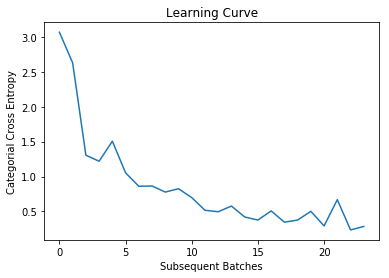

In [31]:
plt.plot(np.arange(epochs*num_of_batches),loss_values)
plt.title("Learning Curve")
plt.xlabel('Subsequent Batches')
plt.ylabel('Categorial Cross Entropy')

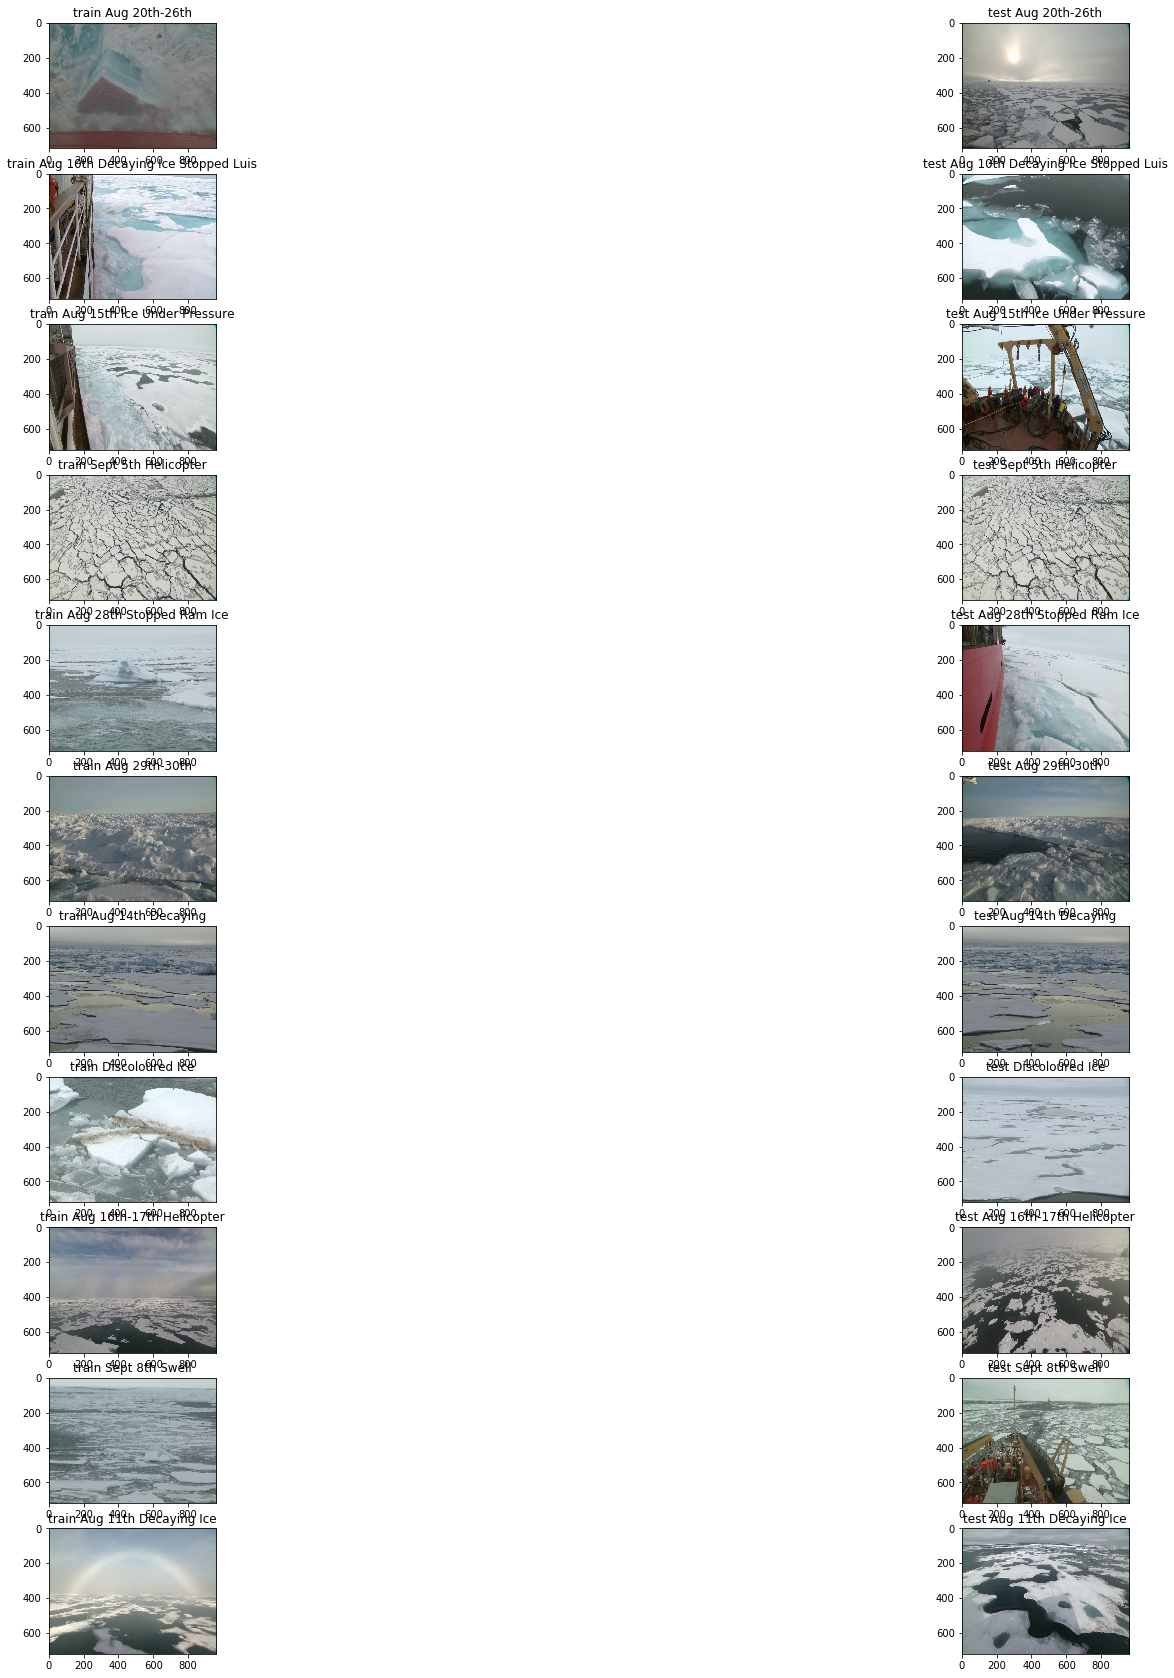

In [32]:
f, axarr = plt.subplots(num_labels,2)
f.set_figheight(30)
f.set_figwidth(30)
for i in range(num_labels):
    axarr[i,0].imshow(mpimg.imread(images_to_show[i][0]))
    axarr[i,0].title.set_text("train "+images_to_show[i][2])
    axarr[i,1].imshow(mpimg.imread(images_to_show[i][1]))
    axarr[i,1].title.set_text("test "+images_to_show[i][2])
plt.show()
plt.savefig('transferlearning.png')
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread(images[0])
# plt.imshow(image)
# plt.show()

In [59]:
validation_labels.toarray()[1*b_size:1*b_size+b_size]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

6

In [69]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8
